In [1]:
import pandas as pd
import os

In [3]:
#convert the dataset from files to a python DataFrame
folder = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
df = pd.DataFrame()
for f in ('test', 'train'):    
    for l in ('pos', 'neg'):
        path = os.path.join(folder, f, l)
        for file in os.listdir (path) :
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]],ignore_index=True)
            
df.columns = ['review', 'sentiment']

In [4]:
print(df)

                                                  review  sentiment
0      I went and saw this movie last night after bei...          1
1      Actor turned director Bill Paxton follows up h...          1
2      As a recreational golfer with some knowledge o...          1
3      I saw this film in a sneak preview, and it is ...          1
4      Bill Paxton has taken the true story of the 19...          1
...                                                  ...        ...
49995  Towards the end of the movie, I felt it was to...          0
49996  This is the kind of movie that my enemies cont...          0
49997  I saw 'Descent' last night at the Stockholm Fi...          0
49998  Some films that you pick up for a pound turn o...          0
49999  This is one of the dumbest films, I've ever se...          0

[50000 rows x 2 columns]


In [5]:
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

In [8]:
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [14]:
import nltk
from nltk.tokenize import word_tokenize

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Emmanuel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
import string

In [29]:
#remove puntuations
def remove_punct(value):
    translator = str.maketrans("", "", string.punctuation)
    return value.translate(translator)



In [31]:
df["review"] = df.review.map(remove_punct)

In [32]:
print(df)

                                                  review  sentiment
0      I went and saw this movie last night after bei...          1
1      Actor turned director Bill Paxton follows up h...          1
2      As a recreational golfer with some knowledge o...          1
3      I saw this film in a sneak preview and it is d...          1
4      Bill Paxton has taken the true story of the 19...          1
...                                                  ...        ...
49995  Towards the end of the movie I felt it was too...          0
49996  This is the kind of movie that my enemies cont...          0
49997  I saw Descent last night at the Stockholm Film...          0
49998  Some films that you pick up for a pound turn o...          0
49999  This is one of the dumbest films Ive ever seen...          0

[50000 rows x 2 columns]


In [33]:
reviews = df.review.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

214138


['the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'I',
 'that',
 'it',
 'this',
 'br',
 'was',
 'The',
 'as',
 'with',
 'for',
 'movie',
 'film',
 'but',
 'on',
 'are',
 'not',
 'have',
 'his',
 'you',
 'be',
 'one',
 'at',
 'by',
 'he',
 'an',
 'all',
 'who',
 'from',
 'like',
 'its',
 'they',
 'so',
 'or',
 'about',
 'her',
 'has',
 'just',
 'out',
 'This',
 'some',
 'good',
 'more',
 'very']

In [17]:
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emmanuel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
#Remove stop words to further clean up the text
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
tokens = list(filter(("br").__ne__, tokens))

In [40]:
frequency_dist = nltk.FreqDist(tokens)

In [21]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
tokens

['I',
 'went',
 'saw',
 'movie',
 'last',
 'night',
 'coaxed',
 'friends',
 'mine',
 'Ill',
 'admit',
 'I',
 'reluctant',
 'see',
 'I',
 'knew',
 'Ashton',
 'Kutcher',
 'able',
 'comedy',
 'I',
 'wrong',
 'Kutcher',
 'played',
 'character',
 'Jake',
 'Fischer',
 'well',
 'Kevin',
 'Costner',
 'played',
 'Ben',
 'Randall',
 'professionalism',
 'The',
 'sign',
 'good',
 'movie',
 'toy',
 'emotions',
 'This',
 'one',
 'exactly',
 'The',
 'entire',
 'theater',
 'sold',
 'overcome',
 'laughter',
 'first',
 'half',
 'movie',
 'moved',
 'tears',
 'second',
 'half',
 'While',
 'exiting',
 'theater',
 'I',
 'saw',
 'many',
 'women',
 'tears',
 'many',
 'full',
 'grown',
 'men',
 'well',
 'trying',
 'desperately',
 'let',
 'anyone',
 'see',
 'crying',
 'This',
 'movie',
 'great',
 'I',
 'suggest',
 'go',
 'see',
 'judge',
 'Actor',
 'turned',
 'director',
 'Bill',
 'Paxton',
 'follows',
 'promising',
 'debut',
 'Gothichorror',
 'Frailty',
 'family',
 'friendly',
 'sports',
 'drama',
 '1913',
 'U

In [25]:
#Visualize the data
from wordcloud import WordCloud
import matplotlib.pyplot as plt

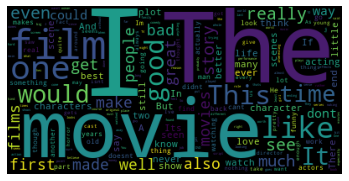

In [41]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [100]:
#Bulding a Classiifier
x_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
x_test = df.loc[:25000, 'review'].values
y_test = df.loc[:25000, 'sentiment'].values

In [105]:
print(y_train)
len(x_train)

[1 1 1 ... 0 0 0]


25000

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)
print(train_vectors.shape, test_vectors.shape)

(25000, 118488) (25001, 118488)


In [ ]:
print(train_vectors[0])

In [60]:
#Train the model
from sklearn.naive_bayes import MultinomialNB

In [103]:
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#Evaluate the model

In [117]:
from  sklearn.metrics  import accuracy_score
with open('C:\\Users\\Emmanuel\\Desktop\\sent.txt','r', encoding='utf-8') as infile:
    txt = infile.read()
    print(txt)
test = vectorizer.transform([txt]);
predicted = clf.predict(test)
print(predicted)
# print(accuracy_score(y_test,predicted))

I have 14 hours in this game as of the posting of this review. I'm sure that number is going to rise extensively as an example of how good this game is.

mistake #1: fighting more than two zombies at once (as a new player with nothing as a weapon)
mistake #2: backing myself into a corner of a house with no where to go
mistake #3: not securing a place to stay overnight, leading to exhaustion
mistake #4: not leading zombies away from where I want to loot, leading to starvation
mistake #5: thinking I can comfortably survive in a city instead of finding a car and some gas to leave the spawn city
mistake #6: just getting merely scratched by a zombie, leading to an unrealized sickness and death
mistake #7: leaving my car running while I loot, attracting substantially more zombies than I would've expected, preventing me from making a quick escape later.

it's all one big learning experience. 
[0]
